# Boston Price Prediction

In [196]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()
from sklearn.metrics import mean_squared_error

In [197]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [198]:
boston=load_boston()

In [199]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [200]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [201]:
# Shape of the data
print(boston.data.shape)

(506, 13)


In [202]:
# Print the set of columns names in it
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [203]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [204]:

len(boston.feature_names)

13

>There are 4 keys in the bunch [‘data’, ‘target’, ‘feature_names’, ‘DESCR’] as mentioned above. The data has 506 rows and 13 feature variable. Notice that this doesn’t include target variable. Also the names of the columns are also extracted. The details about the features and more information about the dataset can be seen by using boston.DESCR`

In [205]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [206]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

>Before applying any EDA or model we have to convert this to a pandas dataframe, which we can do by calling the dataframe on boston.data. We also adds the target variable to the dataframe from boston.target

In [207]:
# Lets create a pandas data frame
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## Data Preprocessing

In [208]:
# To check if null values exists
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

There are no null values above

In [209]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

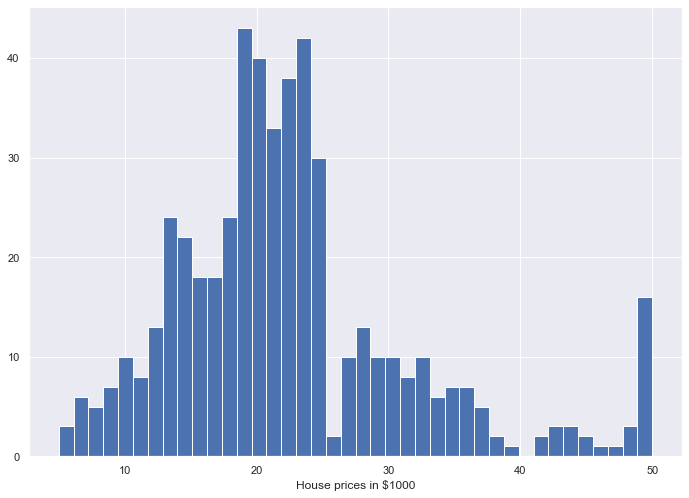

In [210]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['PRICE'], bins=40)
plt.xlabel("House prices in $1000")
plt.show()

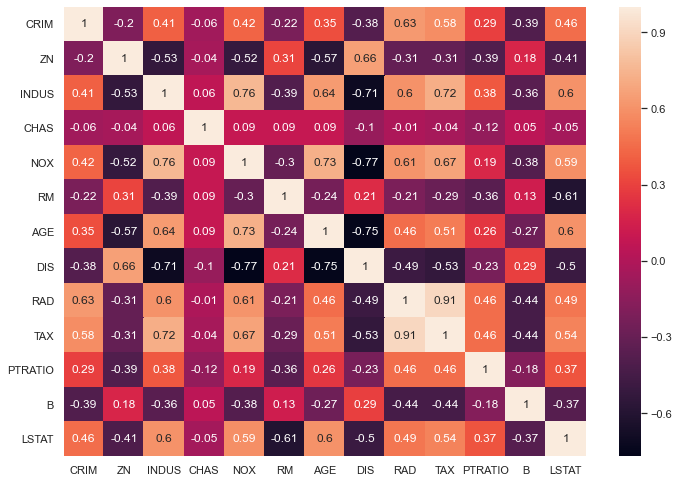

In [211]:
'''Now lets plot a corelation matrix'''

#Created a dataframe without the price col, since we need to see the correlation between the variables
bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# But for now we will keep all the features.

In [212]:
y = bos['PRICE']
X =bos.drop(columns = ['PRICE'])

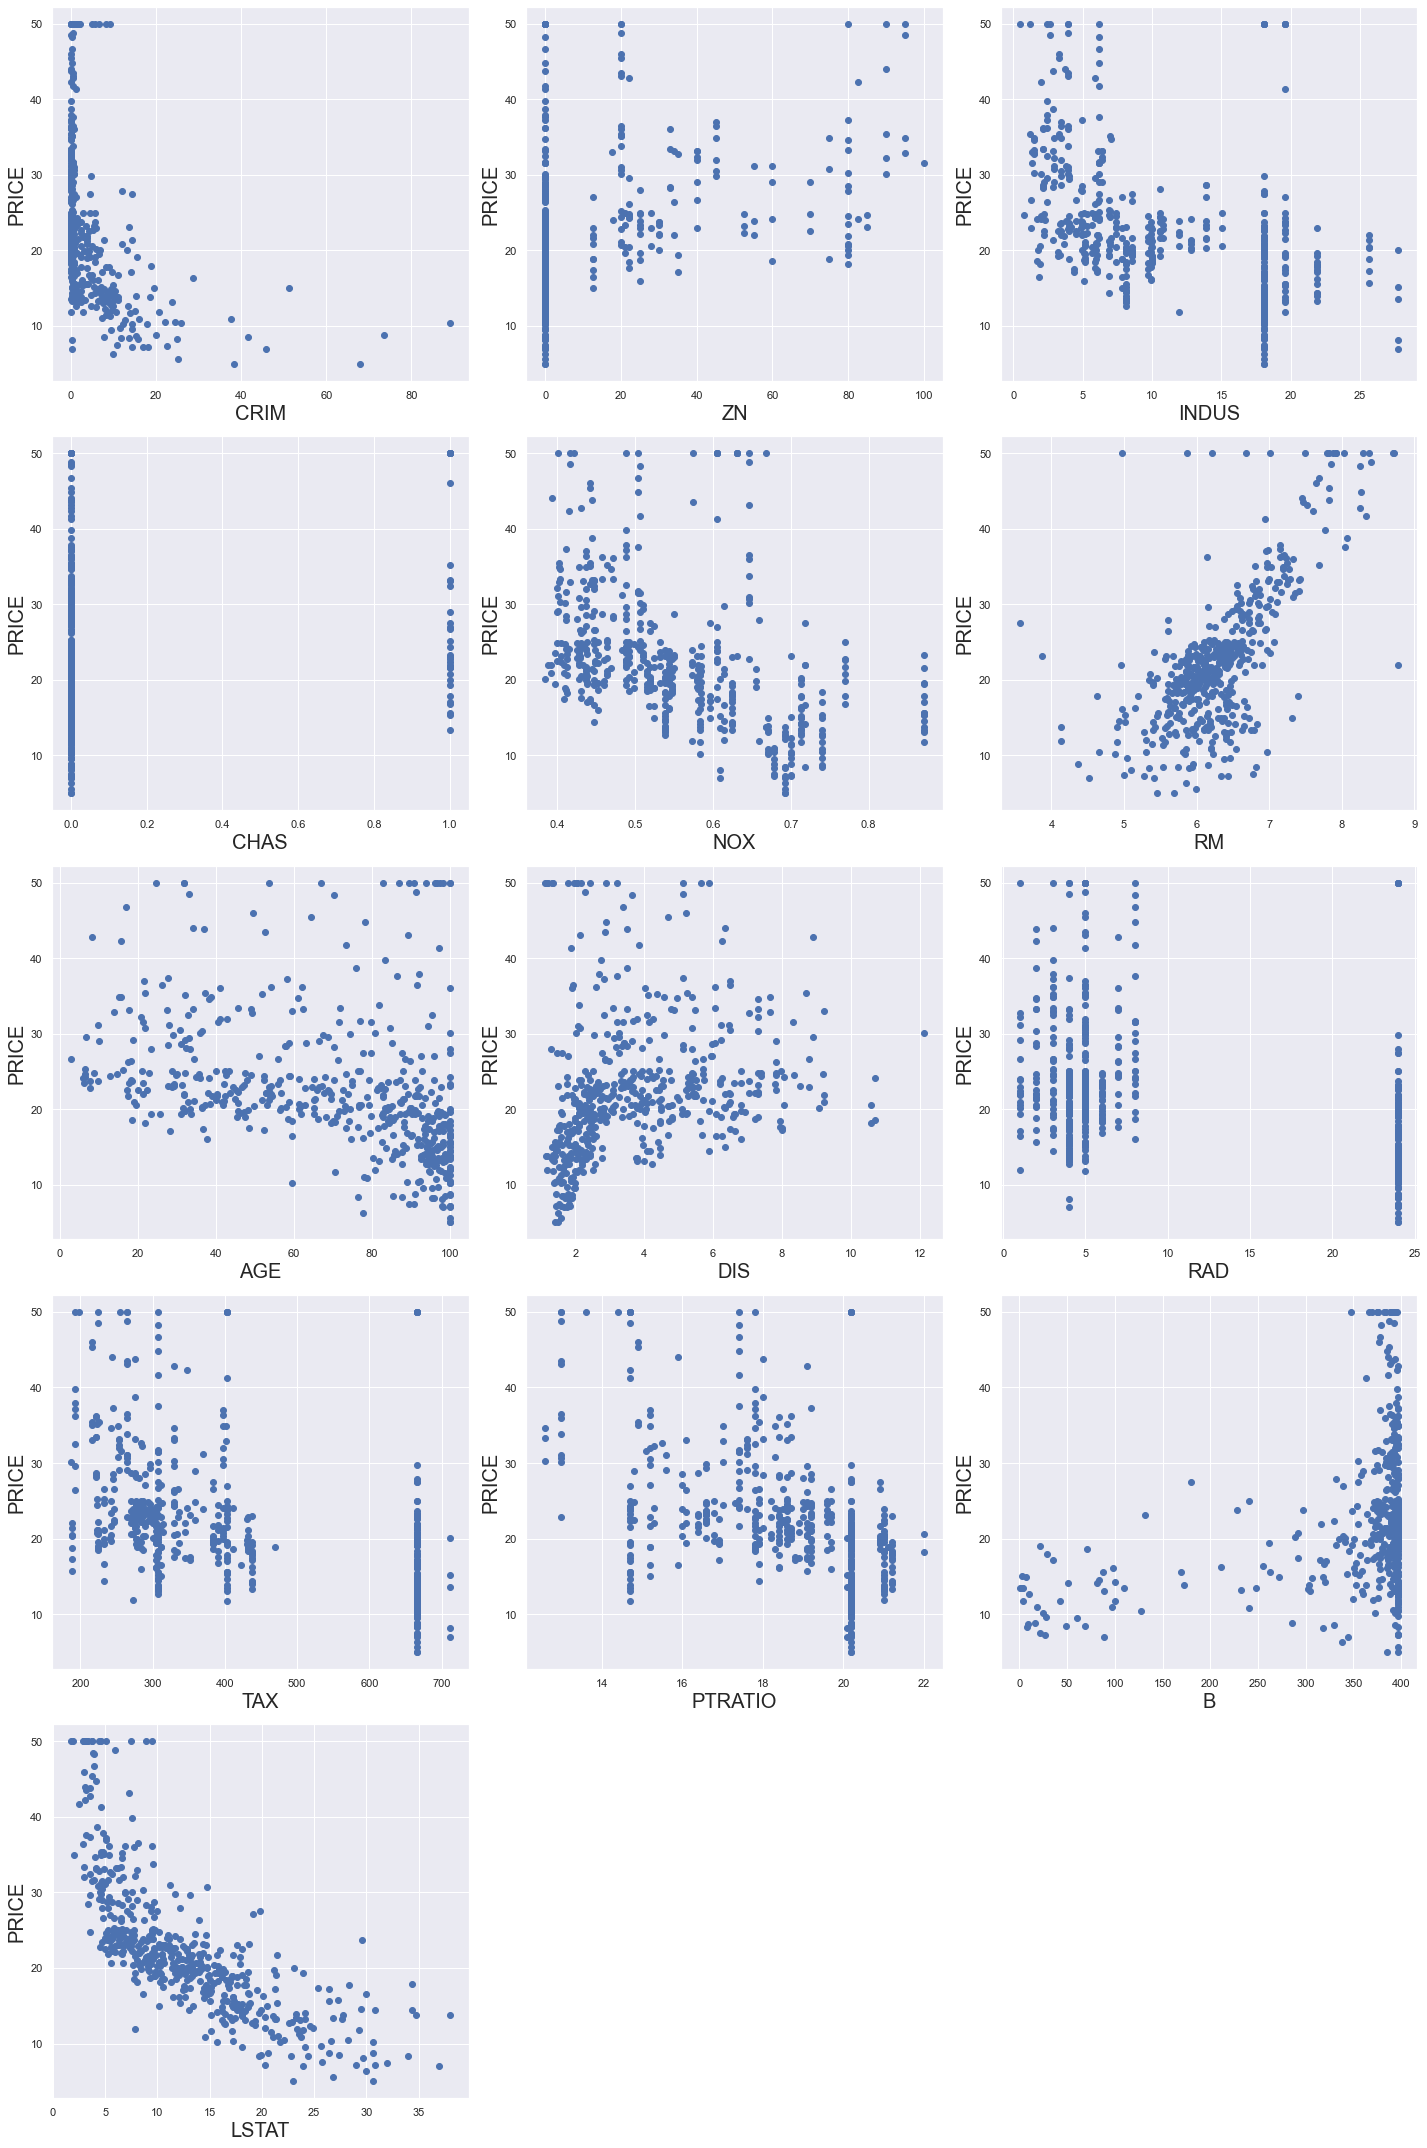

In [213]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PRICE',fontsize=20)
    plotnumber+=1
plt.tight_layout()

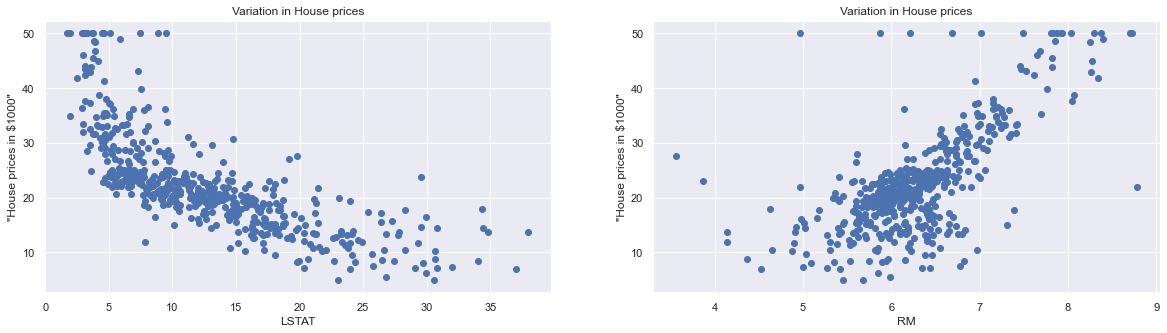

In [214]:
# But now we only check for LSAT and RM
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bos['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

Since it is really hard to visualize with the multiple features, we will 1st predict the house price with just one variable and then move to the regression with all features.

Since you saw that ‘RM’ shows positive correlation with the House Prices we will use this variable.

In [215]:
X_rooms = bos.RM
y_price = bos.PRICE
X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


Splitting the data into training and testing sets
Since we need to test our model, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data.
To split the data we use train_test_split function provided by scikit-learn library. We finally print the shapes of our training and test set to verify if the splitting has occurred properly.

In [216]:
x_train,x_test,y_train,y_test = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [217]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [218]:
# saving the model to the local file system
filename = 'finalized_model_LRAssignment.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [219]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict([[6]])
a

array([[20.10160815]])

In [220]:
regression.score(x_train,y_train) # R^2 score

0.4340897790637215

In [221]:
adj_r2(x_train,y_train) # Adjusted R^2 score

0.4326820421957208

In [222]:
regression.score(x_test,y_test)

0.6938399401553497

In [223]:
adj_r2(x_test,y_test)

0.6907783395569032

In [224]:
y_train_predict = regression.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(regression.score(x_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43




In [225]:
#model performance on train data for all variables

# model evaluation for test set

y_pred = regression.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(regression.score(x_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69




In [226]:
print(min(X_rooms), max(X_rooms))

[3.561] [8.78]


In [227]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms))
prediction_space.shape

(50, 1)

In [228]:
prediction_space

array([[3.561     ],
       [3.6675102 ],
       [3.77402041],
       [3.88053061],
       [3.98704082],
       [4.09355102],
       [4.20006122],
       [4.30657143],
       [4.41308163],
       [4.51959184],
       [4.62610204],
       [4.73261224],
       [4.83912245],
       [4.94563265],
       [5.05214286],
       [5.15865306],
       [5.26516327],
       [5.37167347],
       [5.47818367],
       [5.58469388],
       [5.69120408],
       [5.79771429],
       [5.90422449],
       [6.01073469],
       [6.1172449 ],
       [6.2237551 ],
       [6.33026531],
       [6.43677551],
       [6.54328571],
       [6.64979592],
       [6.75630612],
       [6.86281633],
       [6.96932653],
       [7.07583673],
       [7.18234694],
       [7.28885714],
       [7.39536735],
       [7.50187755],
       [7.60838776],
       [7.71489796],
       [7.82140816],
       [7.92791837],
       [8.03442857],
       [8.14093878],
       [8.24744898],
       [8.35395918],
       [8.46046939],
       [8.566

In [229]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
print(prediction_space)
print(prediction_space.shape)

[[3.561     ]
 [3.6675102 ]
 [3.77402041]
 [3.88053061]
 [3.98704082]
 [4.09355102]
 [4.20006122]
 [4.30657143]
 [4.41308163]
 [4.51959184]
 [4.62610204]
 [4.73261224]
 [4.83912245]
 [4.94563265]
 [5.05214286]
 [5.15865306]
 [5.26516327]
 [5.37167347]
 [5.47818367]
 [5.58469388]
 [5.69120408]
 [5.79771429]
 [5.90422449]
 [6.01073469]
 [6.1172449 ]
 [6.2237551 ]
 [6.33026531]
 [6.43677551]
 [6.54328571]
 [6.64979592]
 [6.75630612]
 [6.86281633]
 [6.96932653]
 [7.07583673]
 [7.18234694]
 [7.28885714]
 [7.39536735]
 [7.50187755]
 [7.60838776]
 [7.71489796]
 [7.82140816]
 [7.92791837]
 [8.03442857]
 [8.14093878]
 [8.24744898]
 [8.35395918]
 [8.46046939]
 [8.56697959]
 [8.6734898 ]
 [8.78      ]]
(50, 1)


In [230]:
regression.predict(prediction_space)

array([[-1.41880187],
       [-0.47901374],
       [ 0.4607744 ],
       [ 1.40056254],
       [ 2.34035067],
       [ 3.28013881],
       [ 4.21992694],
       [ 5.15971508],
       [ 6.09950321],
       [ 7.03929135],
       [ 7.97907949],
       [ 8.91886762],
       [ 9.85865576],
       [10.79844389],
       [11.73823203],
       [12.67802016],
       [13.6178083 ],
       [14.55759644],
       [15.49738457],
       [16.43717271],
       [17.37696084],
       [18.31674898],
       [19.25653711],
       [20.19632525],
       [21.13611339],
       [22.07590152],
       [23.01568966],
       [23.95547779],
       [24.89526593],
       [25.83505406],
       [26.7748422 ],
       [27.71463034],
       [28.65441847],
       [29.59420661],
       [30.53399474],
       [31.47378288],
       [32.41357101],
       [33.35335915],
       [34.29314729],
       [35.23293542],
       [36.17272356],
       [37.11251169],
       [38.05229983],
       [38.99208796],
       [39.9318761 ],
       [40

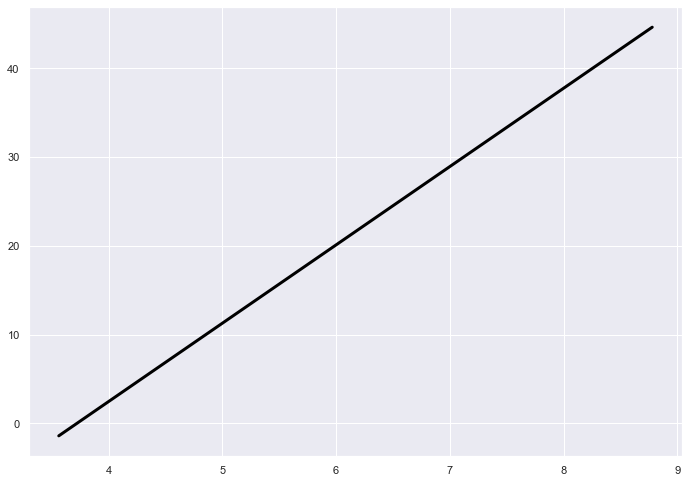

In [231]:
plt.plot(prediction_space, regression.predict(prediction_space), color = 'black', linewidth = 3)

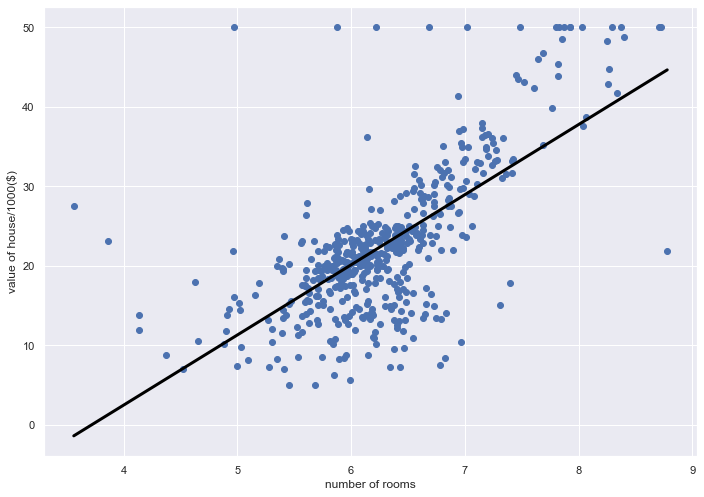

In [233]:
# Lets observe how our model works
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, regression.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

Regression Model for All the variables
Now we will create a model considering all the features in the dataset. The process is almost the same and also the evaluation model but in this case the visualization will not be possible in a 2D space.

In [234]:
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [236]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [237]:
# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75




In [238]:
# model evaluation for test set

y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.928602182665345
R^2: 0.67




Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

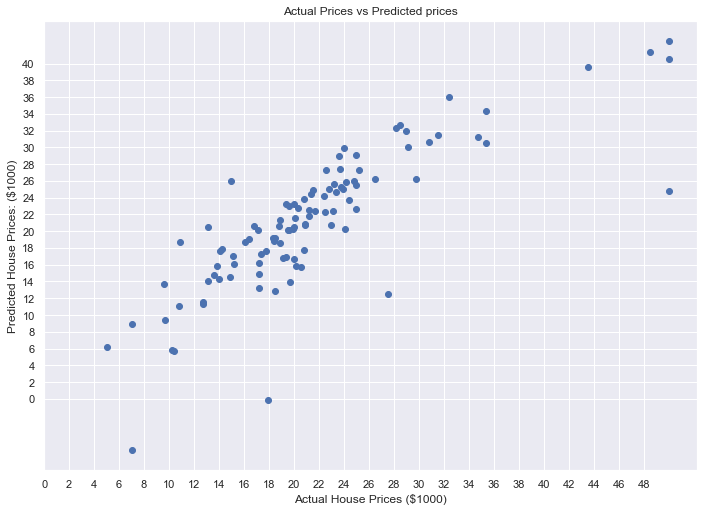

In [239]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(y_test)),2))
plt.yticks(range(0, int(max(y_pred)),2))
plt.title("Actual Prices vs Predicted prices")